# Test and visualize simple parser data

In [1]:
from keras_frcnn.simple_parser import get_data

In [2]:
def format_img_size(img, C):
	""" formats the image size based on config """
	img_min_side = float(C.im_size)
	(height,width,_) = img.shape
		
	if width <= height:
		ratio = img_min_side/width
		new_height = int(ratio * height)
		new_width = int(img_min_side)
	else:
		ratio = img_min_side/height
		new_width = int(ratio * width)
		new_height = int(img_min_side)
	img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
	return img, ratio	

def format_img_channels(img, C):
	""" formats the image channels based on config """
	img = img[:, :, (2, 1, 0)]
	img = img.astype(np.float32)
	img[:, :, 0] -= C.img_channel_mean[0]
	img[:, :, 1] -= C.img_channel_mean[1]
	img[:, :, 2] -= C.img_channel_mean[2]
	img /= C.img_scaling_factor
	img = np.transpose(img, (2, 0, 1))
	img = np.expand_dims(img, axis=0)
	return img

def format_img(img, C):
	""" formats an image for model prediction based on config """
	img, ratio = format_img_size(img, C)
	img = format_img_channels(img, C)
	return img, ratio


In [3]:
all_data, classes_count, class_mapping = get_data('data/Simple/elevator.txt')

Parsing annotation files


In [5]:
print(class_mapping)
print(classes_count)
print(all_data)

{'person': 0}
{'person': 1}
[{'filepath': 'data/Simple/10591.jpg', 'height': 288, 'width': 352, 'imageset': 'trainval', 'bboxes': [{'y1': 123, 'x1': 125, 'x2': 288, 'class': 'person', 'y2': 223}]}]


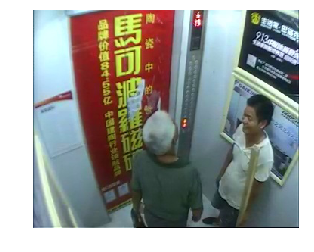

In [14]:
# http://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline
img = cv2.imread(all_data[0]['filepath'])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#image = mpimg.imread(all_data[0]['filepath'])
#plt.imshow(image)
plt.axis('off')
plt.show()
# X, ratio = format_img(img, C)

In [8]:
print(img)

[[[120 103  64]
  [180 163 124]
  [192 175 136]
  ..., 
  [183 174 147]
  [185 176 149]
  [131 120  93]]

 [[123 106  67]
  [184 167 128]
  [195 178 139]
  ..., 
  [189 185 157]
  [193 189 161]
  [137 133 105]]

 [[125 108  69]
  [187 170 131]
  [198 181 142]
  ..., 
  [188 192 163]
  [191 195 166]
  [133 137 108]]

 ..., 
 [[ 92  65  51]
  [124  97  83]
  [129 102  88]
  ..., 
  [146 135 113]
  [152 141 119]
  [123 112  90]]

 [[ 89  62  48]
  [124  97  83]
  [131 104  90]
  ..., 
  [139 126 110]
  [144 131 115]
  [126 113  97]]

 [[108  81  67]
  [148 121 107]
  [156 129 115]
  ..., 
  [ 21   7   0]
  [ 26  12   0]
  [ 16   2   0]]]
